In [1]:
import os
os.chdir('../../..')

In [3]:
import convokit

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
from convokit import Corpus, download

In [5]:
corpus = Corpus(filename=download('reddit-corpus-small'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/reddit-corpus-small


## 1. First, generate the 3-way tensor (hypergraph_features x (time within comment thread) x threads in subreddit)

Let's get a sense of how we should normalize the time within threads.

In [6]:
top_level_comment_ids = [utt.id for utt in corpus.iter_utterances() if utt.id == utt.meta['top_level_comment']]

In [8]:
corpus = corpus.reindex_conversations(top_level_comment_ids)

In [9]:
corpus.print_summary_stats()

Number of Users: 116643
Number of Utterances: 288846
Number of Conversations: 10000


In [10]:
def time_from_first_to_last_utt(convo):
    utts = convo.get_chronological_utterance_list()
    return utts[-1].timestamp - utts[0].timestamp

In [11]:
time_diffs = [time_from_first_to_last_utt(convo) for convo in corpus.iter_conversations()]

In [16]:
time_diffs_mins = [t / 60 for t in time_diffs]

In [26]:
time_diffs_days = [t / (60*60*24) for t in time_diffs]

In [17]:
import matplotlib.pyplot as plt

(array([8812.,  691.,  255.,   86.,   52.,   45.,   25.,   13.,   11.,
          10.]),
 array([9.02777778e-04, 2.40508218e+00, 4.80926157e+00, 7.21344097e+00,
        9.61762037e+00, 1.20217998e+01, 1.44259792e+01, 1.68301586e+01,
        1.92343380e+01, 2.16385174e+01, 2.40426968e+01]),
 <a list of 10 Patch objects>)

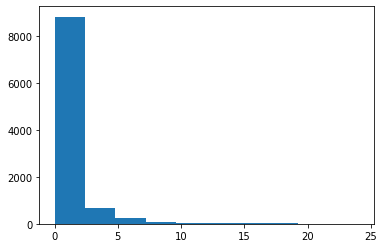

In [28]:
plt.hist(time_diffs_days)

In [29]:
len(time_diffs_days)

10000

In [40]:
len([t for t in time_diffs_days if t<=2])

8469